# EDA and Preprocessing
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.


In [159]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


In [130]:
#  Load the dataset
df = pd.read_csv("Employee.csv")  
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Exploration

In [131]:
# Display the first 5 rows
df.head(5)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [132]:
# to get the basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [133]:
# Finding unique value in each column
df['Company'].unique()


array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [134]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [135]:
df['Salary'].unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [136]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [137]:
df['Country'].unique()

array(['India'], dtype=object)

In [138]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [139]:
# Replace specific values in the 'Company' column
df['Company'] = df['Company'].replace({
    'Tata Consultancy Services': 'TCS',
    'Infosys Pvt Lmt': 'Infosys',
    'Congnizant': 'CTS'  # Optional: Fix typos too
})
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

# Data Cleaning

In [140]:
#  Replace inappropriate value — age=0 instead of nan
df['Age'] = df['Age'].replace(0, np.nan)


In [141]:
#  Show missing values
print(df.isnull().sum())

Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [142]:
# Treat missing values
# For numerical columns replace with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)


C:\Users\prave\AppData\Local\Temp\ipykernel_9920\3535372854.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\prave\AppData\Local\Temp\ipykernel_9920\3535372854.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [143]:
# For categorical columns replace missing values with mode
df['Company'].fillna(df['Company'].mode()[0], inplace=True)
df['Place'].fillna(df['Place'].mode()[0], inplace=True)


C:\Users\prave\AppData\Local\Temp\ipykernel_9920\3526158575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company'].fillna(df['Company'].mode()[0], inplace=True)
C:\Users\prave\AppData\Local\Temp\ipykernel_9920\3526158575.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [144]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
len(df)

144

In [145]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [146]:
# there is no more missing values in columns

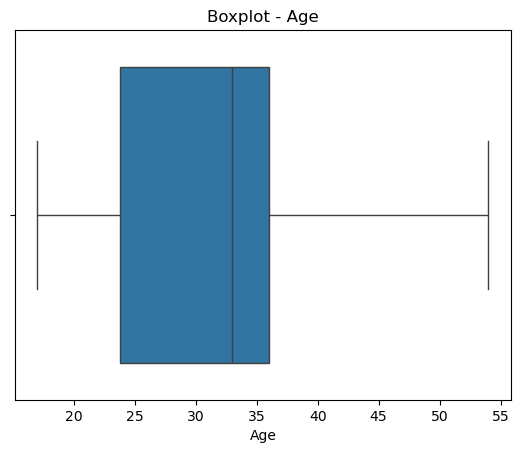

In [147]:
# Finding outliers
# Boxplot for age
sns.boxplot(x=df['Age'])
plt.title('Boxplot - Age')
plt.show()

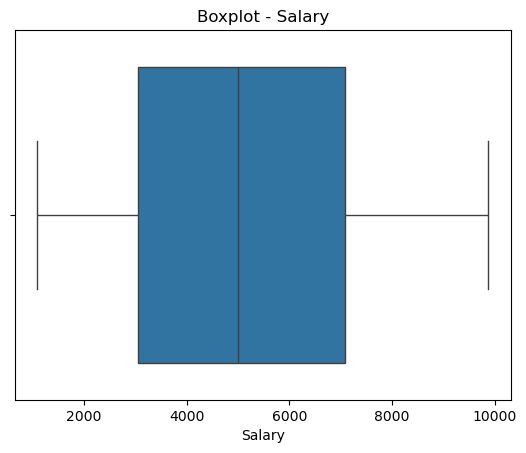

In [148]:
# Boxplot for age
sns.boxplot(x=df['Salary'])
plt.title('Boxplot - Salary')
plt.show()

From the above boxpot no outliers are shown.

In [149]:
# Define a function to find outliers using IQR
def Find_outliers(data,column):
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = data[(data[column] < lower)  | (data[column] > upper)]
    return outliers

# calling function to find outliers of salary and age column
salary_outliers = Find_outliers(df,'Salary')
age_outliers = Find_outliers(df,'Age')
print("Number of ourliers in Salary column: ",salary_outliers)
print("Number of ourliers in Age column: ",age_outliers)

Number of ourliers in Salary column:  Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []
Number of ourliers in Age column:  Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


No outliers found using IQR method

# Data Analysis

In [150]:
# Filter the data with age >40 and salary<5000
df_filter = df[(df['Age'] >40) & (df['Salary'] < 5000)]
df_filter

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


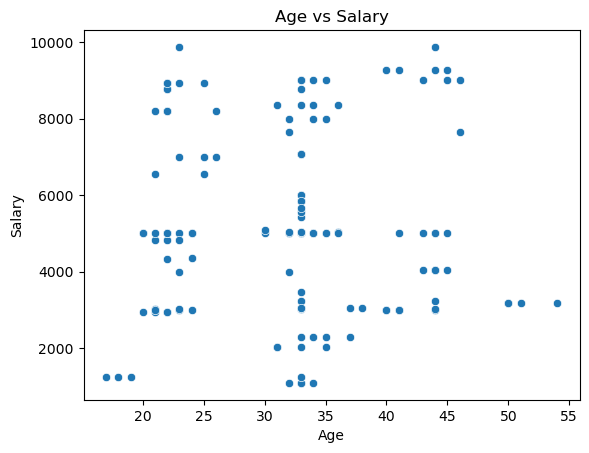

In [151]:
# Plot the chart with age and salary
sns.scatterplot(data = df,x = 'Age', y ='Salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [152]:
#Count the number of people from each place and represent it visually
counts = df['Place'].value_counts()
print("Number of people from each place: ",counts)

Number of people from each place:  Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


<Axes: xlabel='Place', ylabel='count'>

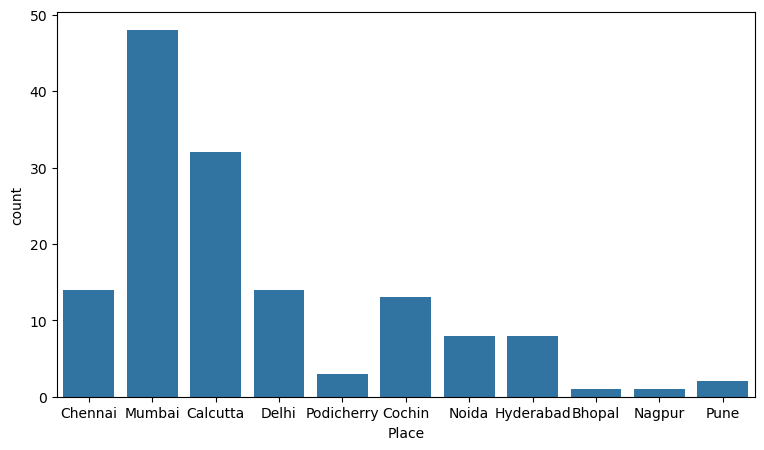

In [153]:
plt.figure(figsize=(9, 5))
sns.countplot(x='Place', data=df)

# Data Encoding

 Converting categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, 
 making them suitable for analysis by machine learning algorithms.

In [154]:
df_labelEncoded = df.copy()

In [158]:
# Using LabelEncoder for encoding 'Place' and 'Company'column
# Initialize the LabelEncoder 
label_encoder = LabelEncoder()

df_labelEncoded['Place_encoded'] = label_encoder.fit_transform(df_labelEncoded['Place'])
df_labelEncoded['Company_encoded'] = label_encoder.fit_transform(df['Company'])

# Using one hot encoding technique for encoding column
df_oneHot = df.copy()
cat_cols = ['Place','Company']
df_oneHot = pd.get_dummies(df_oneHot, columns=cat_cols, drop_first=True)


,Age,Salary,Country,Gender,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Company_Infosys,Company_TCS
0,20.0,5000.0,India,0,False,True,False,False,False,False,False,False,False,False,False,True
1,30.0,5000.0,India,0,False,False,False,False,False,True,False,False,False,False,True,False
2,35.0,2300.0,India,0,True,False,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,India,0,False,False,False,True,False,False,False,False,False,False,True,False
4,23.0,4000.0,India,0,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,India,0,False,False,False,False,False,True,False,False,False,False,True,False
143,33.0,9024.0,India,1,True,False,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.0,India,1,False,False,False,True,False,False,False,False,False,False,True,False
146,33.0,5034.0,India,1,False,False,False,False,False,True,False,False,False,False,False,True


# Feature Scaling

After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [166]:
# performing MinMax scaler
scaler_minmax = MinMaxScaler()
num_col = df_labelEncoded.select_dtypes(include=['int64', 'float64']).columns
df_minmax_scaled = df_labelEncoded.copy()
df_minmax_scaled[num_col] = scaler_minmax.fit_transform(df_labelEncoded[num_col])


In [171]:
# Performing standaed scaler
standard_scaler = StandardScaler()
num_cols = df_oneHot.select_dtypes(include=['int64', 'float64']).columns
df_std_scaled = df_oneHot.copy()
df_std_scaled = standard_scaler.fit_transform(df_oneHot[num_cols])

In [172]:
print("Standard Scaled Data :")
print(df_std_scaled)

print("\nMin-Max Scaled Data :")
print(df_minmax_scaled)

Standard Scaled Data :
[[-1.48467637 -0.10082748 -0.53452248]
 [-0.26717411 -0.10082748 -0.53452248]
 [ 0.34157702 -1.2437349  -0.53452248]
 [ 0.95032816 -0.94742557 -0.53452248]
 [-1.11942569 -0.52412653 -0.53452248]
 [ 0.09807657 -0.10082748 -0.53452248]
 [ 0.09807657  0.32247156  1.87082869]
 [-1.11942569  0.74577061  1.87082869]
 [ 0.2198268   1.16906965  1.87082869]
 [ 1.55907929  1.5923687  -0.53452248]
 [-1.11942569 -0.10082748 -0.53452248]
 [ 0.2198268  -1.75635005 -0.53452248]
 [ 1.55907929 -0.10082748 -0.53452248]
 [-1.72817683 -1.69497168 -0.53452248]
 [ 0.95032816 -0.94742557 -0.53452248]
 [-1.11942569 -0.94742557 -0.53452248]
 [-1.11942569 -0.9347266  -0.53452248]
 [ 0.2198268  -0.10082748 -0.53452248]
 [-1.24117592 -0.10082748 -0.53452248]
 [-0.02367366 -0.10082748 -0.53452248]
 [ 0.58507748 -0.92837711 -0.53452248]
 [ 2.16783042 -0.86953855 -0.53452248]
 [-1.36292615 -0.17532811 -0.53452248]
 [ 0.09807657  0.25262722 -0.53452248]
 [ 0.09807657  0.78132773  1.87082869]
 [